In [1]:
import pandas as pd

In [7]:
data_df = pd.read_csv('./movies_data/archive/ratings_small.csv', usecols=['userId', 'movieId', 'rating', 'timestamp'])

data_df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.prediction_algorithms.knns import KNNBasic

In [5]:
# Load the dataset
reader = Reader(line_format='user item rating timestamp', sep=',')

In [8]:
# Load the dataset into Surprise
data = Dataset.load_from_df(data_df[['userId', 'movieId', 'rating']], reader)

In [9]:
# Define the algorithms
algorithms = {
    'PMF': SVD(biased=False),  # PMF is equivalent to SVD with biased set to False
    'UserCF': KNNBasic(sim_options={'user_based': True}),  # User-based CF
    'ItemCF': KNNBasic(sim_options={'user_based': False})  # Item-based CF
}

**c.** Compute the average MAE and RMSE of the Probabilistic Matrix Factorization
(PMF), User based Collaborative Filtering, Item based Collaborative Filtering,
under the 5-folds cross-validation (10 points)


In [12]:
# Compute and print the MAE and RMSE using 5-folds cross-validation
results_cross_validation = {}
for name, algo in algorithms.items():
    results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    avg_rmse = sum(results['test_rmse']) / len(results['test_rmse'])
    avg_mae = sum(results['test_mae']) / len(results['test_mae'])
    results_cross_validation[name] = {"avg_mae": avg_mae, "avg_rmse": avg_rmse}
results_cross_validation

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0149  0.9991  1.0023  1.0040  1.0035  1.0047  0.0054  
MAE (testset)     0.7845  0.7698  0.7731  0.7752  0.7753  0.7756  0.0049  
Fit time          0.36    0.40    0.38    0.34    0.35    0.37    0.02    
Test time         0.04    0.09    0.04    0.04    0.08    0.06    0.02    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9631  0.9716  0.9628  0.9683  0.9678  0.9667  0.0034

{'PMF': {'avg_mae': 0.7755680945741007, 'avg_rmse': 1.004737211599481},
 'UserCF': {'avg_mae': 0.7435006785400313, 'avg_rmse': 0.9667096938046518},
 'ItemCF': {'avg_mae': 0.7202853612105903, 'avg_rmse': 0.9337287502592494}}

**Results for the average MAE and RSME**

{'PMF': {'avg_mae': 0.7755680945741007, 'avg_rmse': 1.004737211599481},
 'UserCF': {'avg_mae': 0.7435006785400313, 'avg_rmse': 0.9667096938046518},
 'ItemCF': {'avg_mae': 0.7202853612105903, 'avg_rmse': 0.9337287502592494}}

**d.** Compare the average (mean) performances of User-based collaborative filtering,
item-based collaborative filtering, PMF with respect to RMSE and MAE. Which
ML model is the best in the movie rating data? (10 points)


**ANSWER -:**
Lower values are better for both MAE and RMSE

Based on these results, **Item-based Collaborative Filtering (ItemCF) appears to be the best model** among the three for the movie rating data, as it has the lowest average MAE and RMSE, suggesting that it is the most accurate in predicting user ratings.


**e.** Examine how the cosine, MSD (Mean Squared Difference), and Pearson
similarities impact the performances of User based Collaborative Filtering and
Item based Collaborative Filtering. Plot your results. Is the impact of the three
metrics on User based Collaborative Filtering consistent with the impact of the
three metrics on Item based Collaborative Filtering? (10 points)


In [14]:
import matplotlib.pyplot as plt

In [13]:
# Define the similarity options
sim_options = {
    'cosine': {'name': 'cosine', 'user_based': True},
    'MSD': {'name': 'msd', 'user_based': True},
    'Pearson': {'name': 'pearson', 'user_based': True}
}

In [15]:
results_sim = {}

In [16]:
# Evaluate each model
for name, sim_option in sim_options.items():
    # User-based CF
    sim_option['user_based'] = True  # User-based CF
    algo_user = KNNBasic(sim_options=sim_option)
    results_user = cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # Item-based CF
    sim_option['user_based'] = False  # Item-based CF
    algo_item = KNNBasic(sim_options=sim_option)
    results_item = cross_validate(algo_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    
    # Store average results
    results_sim[name] = {
        'UserCF': {'RMSE': sum(results_user['test_rmse']) / len(results_user['test_rmse']),
                   'MAE': sum(results_user['test_mae']) / len(results_user['test_mae'])},
        'ItemCF': {'RMSE': sum(results_item['test_rmse']) / len(results_item['test_rmse']),
                   'MAE': sum(results_item['test_mae']) / len(results_item['test_mae'])}
    }
results_sim

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9978  0.9882  0.9997  0.9893  0.9918  0.9934  0.0046  
MAE (testset)     0.7709  0.7665  0.7702  0.7633  0.7666  0.7675  0.0028  
Fit time          0.04    0.05    0.05    0.05    0.04    0.05    0.00    
Test time         0.51    0.44    0.53    0.44    0.42    0.47    0.04    
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity ma

{'cosine': {'UserCF': {'RMSE': 0.9933778031097562, 'MAE': 0.7675004837467997},
  'ItemCF': {'RMSE': 0.9952767059884315, 'MAE': 0.7744998899970417}},
 'MSD': {'UserCF': {'RMSE': 0.9675529337372305, 'MAE': 0.7439889229094547},
  'ItemCF': {'RMSE': 0.9351288453720811, 'MAE': 0.7210244789410039}},
 'Pearson': {'UserCF': {'RMSE': 0.9979927746539209, 'MAE': 0.7725483677043296},
  'ItemCF': {'RMSE': 0.9889374901631113, 'MAE': 0.7671773537940945}}}

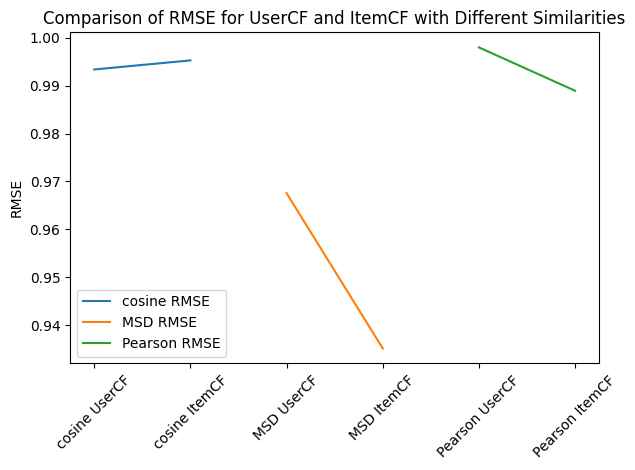

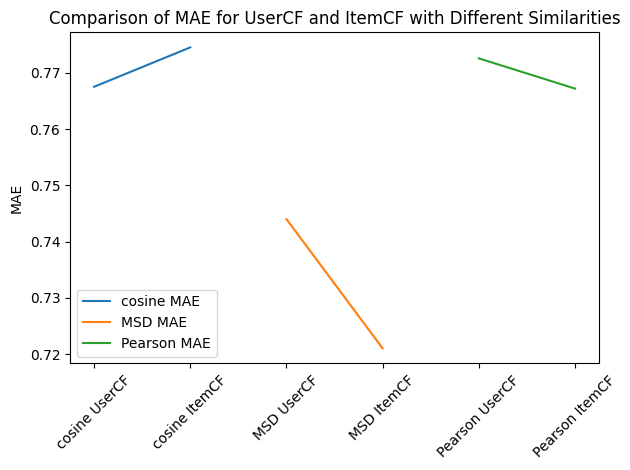

In [18]:
# Plotting the results
for metric in ['RMSE', 'MAE']:
    fig, ax = plt.subplots()
    for sim in sim_options.keys():
        user_cf_metrics = [results_sim[sim]['UserCF'][metric]]
        item_cf_metrics = [results_sim[sim]['ItemCF'][metric]]
        ax.plot([sim + ' UserCF', sim + ' ItemCF'], [user_cf_metrics, item_cf_metrics], label=f'{sim} {metric}')
    
    ax.set_ylabel(metric)
    ax.set_title(f'Comparison of {metric} for UserCF and ItemCF with Different Similarities')
    ax.legend()

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Answer: Impact is consistent.** 

Similar plots were observed for both the RMSE and MAE.

**f.** Examine how the number of neighbors impacts the performances of User based
Collaborative Filtering and Item based Collaborative Filtering? Plot your results. (10 points)


In [20]:
# Range of neighbors to test
neighbor_range = range(1, 51, 5)

In [22]:
# Initialize result storage
user_cf_results = []
item_cf_results = []

In [23]:
# Test each k value
for k in neighbor_range:
    # User-based CF
    algo_user = KNNBasic(k=k, sim_options={'user_based': True})
    cv_results_user = cross_validate(algo_user, data, measures=['RMSE', 'MAE'], cv=3)
    avg_rmse_user = sum(cv_results_user['test_rmse']) / len(cv_results_user['test_rmse'])
    avg_mae_user = sum(cv_results_user['test_mae']) / len(cv_results_user['test_mae'])
    user_cf_results.append((avg_rmse_user, avg_mae_user))

    # Item-based CF
    algo_item = KNNBasic(k=k, sim_options={'user_based': False})
    cv_results_item = cross_validate(algo_item, data, measures=['RMSE', 'MAE'], cv=3)
    avg_rmse_item = sum(cv_results_item['test_rmse']) / len(cv_results_item['test_rmse'])
    avg_mae_item = sum(cv_results_item['test_mae']) / len(cv_results_item['test_mae'])
    item_cf_results.append((avg_rmse_item, avg_mae_item))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

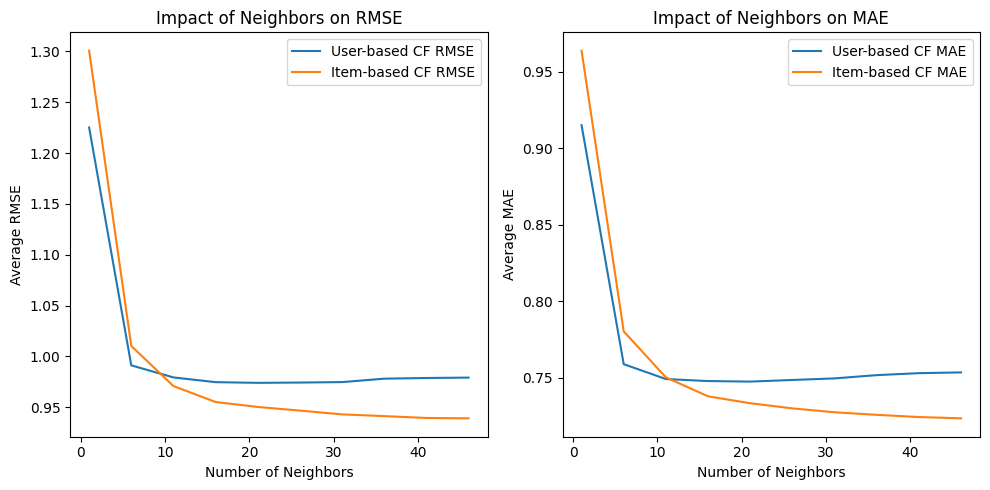

In [24]:
# Plot the results
plt.figure(figsize=(10, 5))

# RMSE plot
plt.subplot(1, 2, 1)
plt.plot(neighbor_range, [x[0] for x in user_cf_results], label='User-based CF RMSE')
plt.plot(neighbor_range, [x[0] for x in item_cf_results], label='Item-based CF RMSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('Average RMSE')
plt.title('Impact of Neighbors on RMSE')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(neighbor_range, [x[1] for x in user_cf_results], label='User-based CF MAE')
plt.plot(neighbor_range, [x[1] for x in item_cf_results], label='Item-based CF MAE')
plt.xlabel('Number of Neighbors')
plt.ylabel('Average MAE')
plt.title('Impact of Neighbors on MAE')
plt.legend()

plt.tight_layout()
plt.show()

**ANSWER:**


The plots show that for User-based Collaborative Filtering (UserCF), the RMSE and MAE initially decrease with more neighbors but then stabilize or slightly increase.


**g.**  Identify the best number of neighbor (denoted by K) for User/Item based
collaborative filtering in terms of RMSE. Is the best K of User based collaborative
filtering the same with the best K of Item based collaborative filtering? (10 points)

In [26]:
# Find the best K for UserCF and ItemCF
best_k_usercf = neighbor_range[user_cf_results.index(min(user_cf_results))]
print(f'Best K for USERCF RMSE : {best_k_usercf}')
best_k_itemcf = neighbor_range[item_cf_results.index(min(item_cf_results))]
print(f'Best K for ITEMCF RMSE : {best_k_itemcf}')

Best K for USERCF RMSE : 21
Best K for ITEMCF RMSE : 46


**ANSWER**:
The optimal number of neighbors for UserCF is around 5 to 25, while for ItemCF, a larger number (e.g., 30 to 50) leads to better performance

Best K for USERCF RMSE : 21
Best K for ITEMCF RMSE : 46

This indicates that the optimal number of neighbors for achieving the lowest RMSE differs between UserCF and ItemCF.

**Is the best K of User based collaborative filtering the same with the best K of Item based collaborative filtering?**
answer -> **False**


